In [1]:
import pandas as pd
import numpy as np

import pyaf.ForecastEngine as autof
import pyaf.Bench.TS_datasets as tsds


%matplotlib inline  

In [2]:
import datetime as dt
from dateutil.relativedelta import relativedelta

def addMonths(iTime , iMonths):
    lTime = iTime
    date_after_month = lTime + relativedelta(months=iMonths)
    #print(lTime, iMonths, date_after_month);
    return np.datetime64(date_after_month) 


In [3]:
b1 = tsds.load_ozone()
df = b1.mPastData

     Month  Ozone       Time
0  1955-01    2.7 1955-01-01
1  1955-02    2.0 1955-02-01
2  1955-03    3.6 1955-03-01
3  1955-04    5.0 1955-04-01
4  1955-05    6.5 1955-05-01


In [4]:
df.head()

,Month,Ozone,Time
0,1955-01,2.7,1955-01-01
1,1955-02,2.0,1955-02-01
2,1955-03,3.6,1955-03-01
3,1955-04,5.0,1955-04-01
4,1955-05,6.5,1955-05-01


In [5]:
df.Time.describe()

count                     204
unique                    204
top       1970-02-01 00:00:00
freq                        1
first     1955-01-01 00:00:00
last      1971-12-01 00:00:00
Name: Time, dtype: object

In [6]:
x = pd.Series(range(3,10));
df.head()

,Month,Ozone,Time
0,1955-01,2.7,1955-01-01
1,1955-02,2.0,1955-02-01
2,1955-03,3.6,1955-03-01
3,1955-04,5.0,1955-04-01
4,1955-05,6.5,1955-05-01


In [7]:
def replicate(df , K):
    N = df.shape[0];
    y = pd.Series(range(K*N));
    tmin = df.Time.min()
    Time1 = y.apply(lambda x : addMonths(tmin , x))
    # Time1.describe()
    Ozone1 = pd.concat([df.Ozone] * K)
    print(Time1.shape, Ozone1.shape, Time1.describe(), Ozone1.describe())
    df1 = pd.DataFrame();
    df1['Time'] = Time1.values;
    print(Ozone1.describe());
    df1['Ozone'] = Ozone1.values;
    return df1;

In [8]:
df1 = replicate(df, 12);
df1.head()

(2448,) (2448,) count                    2448
unique                   2448
top       2128-09-01 00:00:00
freq                        1
first     1955-01-01 00:00:00
last      2158-12-01 00:00:00
dtype: object count    2448.000000
mean        3.835784
std         1.491864
min         1.200000
25%         2.600000
50%         3.750000
75%         4.825000
max         8.700000
Name: Ozone, dtype: float64
count    2448.000000
mean        3.835784
std         1.491864
min         1.200000
25%         2.600000
50%         3.750000
75%         4.825000
max         8.700000
Name: Ozone, dtype: float64


,Time,Ozone
0,1955-01-01,2.7
1,1955-02-01,2.0
2,1955-03-01,3.6
3,1955-04-01,5.0
4,1955-05-01,6.5


In [9]:
df1.describe()

,Ozone
count,2448.000000
mean,3.835784
std,1.491864
min,1.200000
25%,2.600000
50%,3.750000
75%,4.825000
max,8.700000


In [10]:

lEngine = autof.cForecastEngine()
lEngine.mOptions.mEnableSeasonals = True;
lEngine

#lEngine.mOptions.enable_slow_mode()
#lEngine.mOptions.mCycle_Criterion = "L2";
#lEngine.mOptions.mCycle_Criterion_Threshold = 10000.2;
        

In [11]:
lEngine.train(df1 , 'Time' , 'Ozone', 12)

In [12]:
lEngine.getModelInfo()

In [13]:
type1 = np.dtype(df.Time)


In [14]:
type1.kind

'M'

In [15]:
lEngine.mSignalDecomposition.mTrPerfDetails

,Transformation,Model,Complexity,FitCount,FitL2,FitMAPE,ForecastCount,ForecastL2,ForecastMAPE,TestCount,TestL2,TestMAPE
0,_Ozone,_Ozone_ConstantTrend_residue_Seasonal_MonthOfY...,260,1948,0.221387,0.0280,488,0.059431,0.0152,12,0.045705,0.0192
1,_Ozone,_Ozone_ConstantTrend_residue_bestCycle_byL2_re...,264,1948,0.221387,0.0280,488,0.059431,0.0152,12,0.045705,0.0192
2,_Ozone,_Ozone_LinearTrend_residue_Seasonal_MonthOfYea...,276,1948,0.221401,0.0280,488,0.060049,0.0154,12,0.049996,0.0204
3,_Ozone,_Ozone_PolyTrend_residue_Seasonal_MonthOfYear_...,276,1948,0.221326,0.0281,488,0.060951,0.0154,12,0.042905,0.0186
4,_Ozone,_Ozone_LinearTrend_residue_bestCycle_byL2_resi...,280,1948,0.221401,0.0280,488,0.060049,0.0154,12,0.049996,0.0204
5,_Ozone,_Ozone_PolyTrend_residue_bestCycle_byL2_residu...,280,1948,0.221326,0.0281,488,0.060951,0.0154,12,0.042905,0.0186
6,_Ozone,_Ozone_ConstantTrend_residue_zeroCycle_residue...,256,1948,0.229781,0.0285,488,0.066387,0.0158,12,0.045819,0.0175
7,_Ozone,_Ozone_Lag1Trend_residue_zeroCycle_residue_AR(...,288,1948,0.245049,0.0301,488,0.067435,0.0166,12,0.045353,0.0180
8,_Ozone,_Ozone_Lag1Trend_residue_Seasonal_MonthOfYear_...,292,1948,0.229343,0.0301,488,0.066485,0.0166,12,0.074977,0.0260
9,_Ozone,_Ozone_Lag1Trend_residue_bestCycle_byL2_residu...,296,1948,0.229343,0.0301,488,0.066485,0.0166,12,0.074977,0.0260


/usr/lib/python3/dist-packages/matplotlib/__init__.py:1403: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


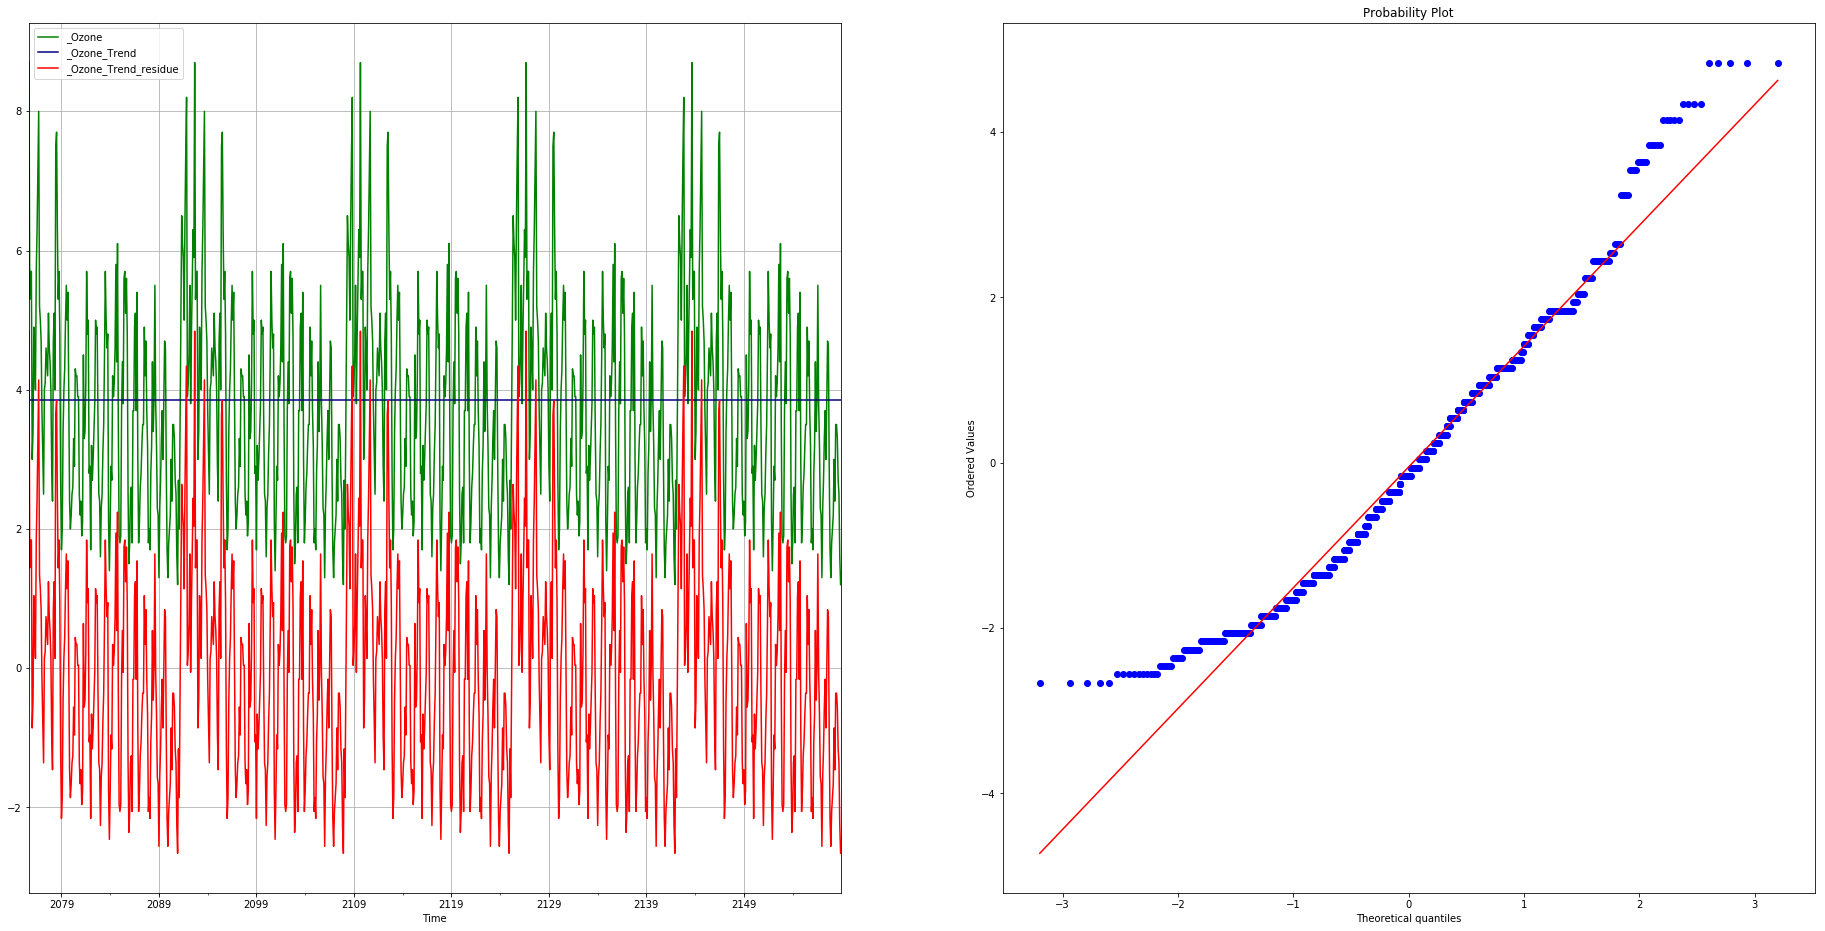

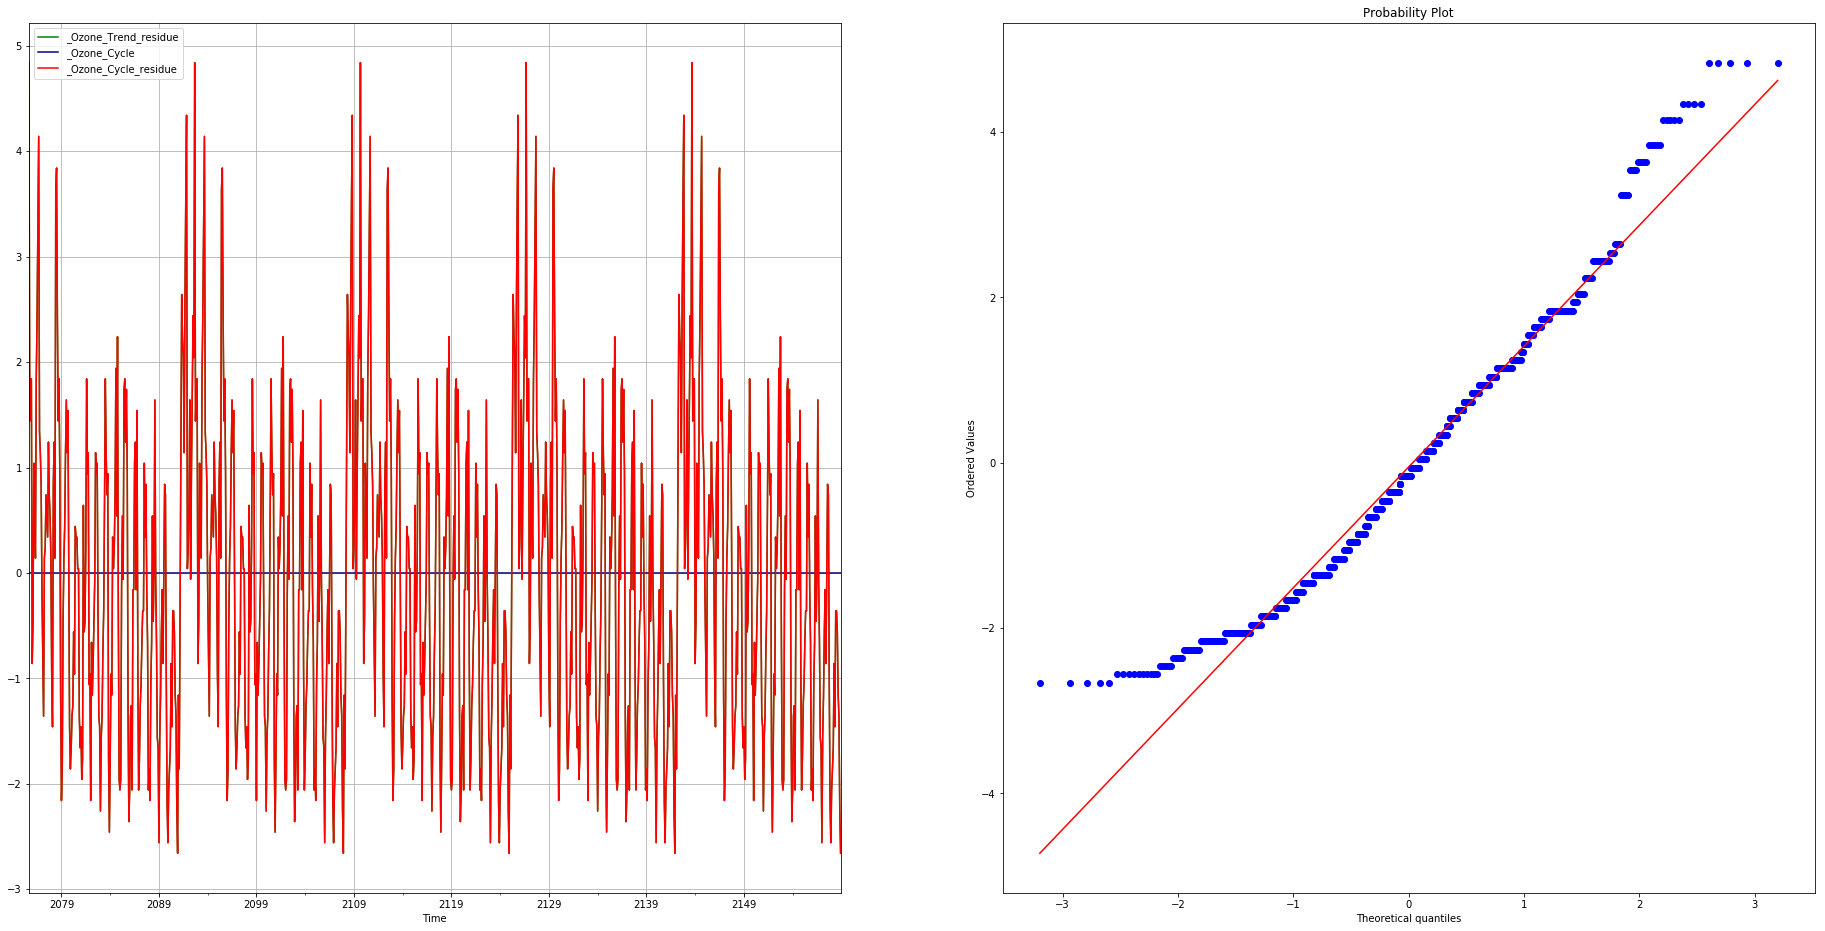

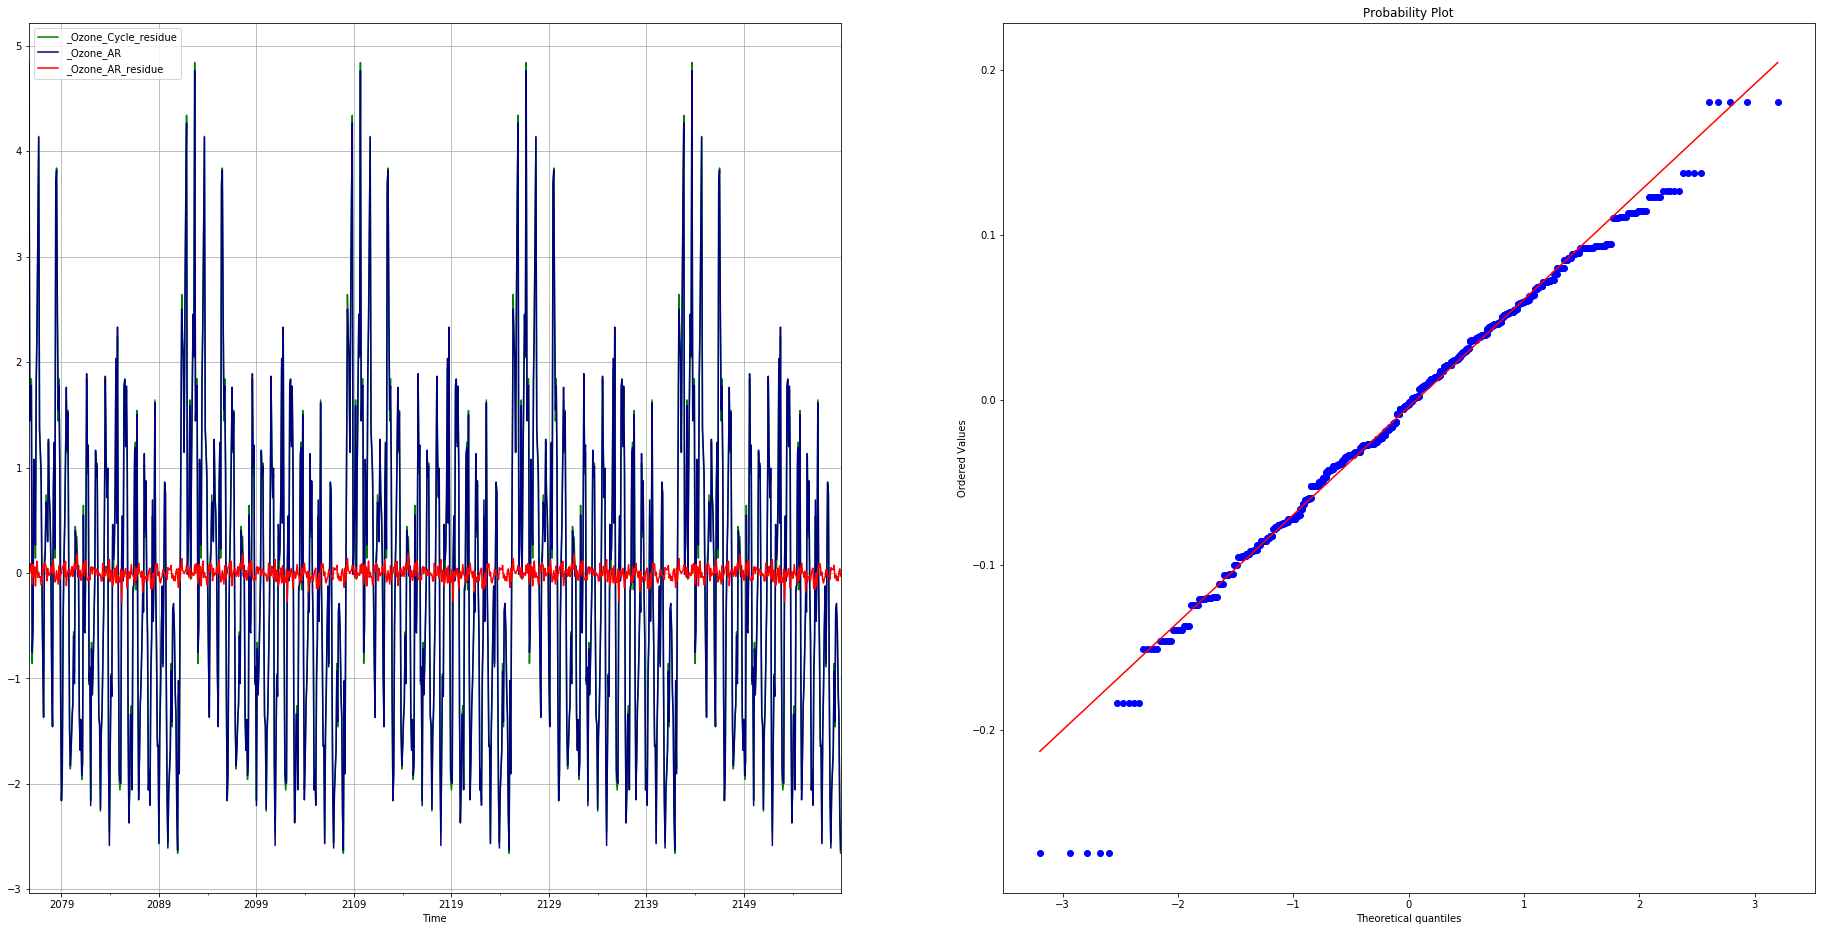

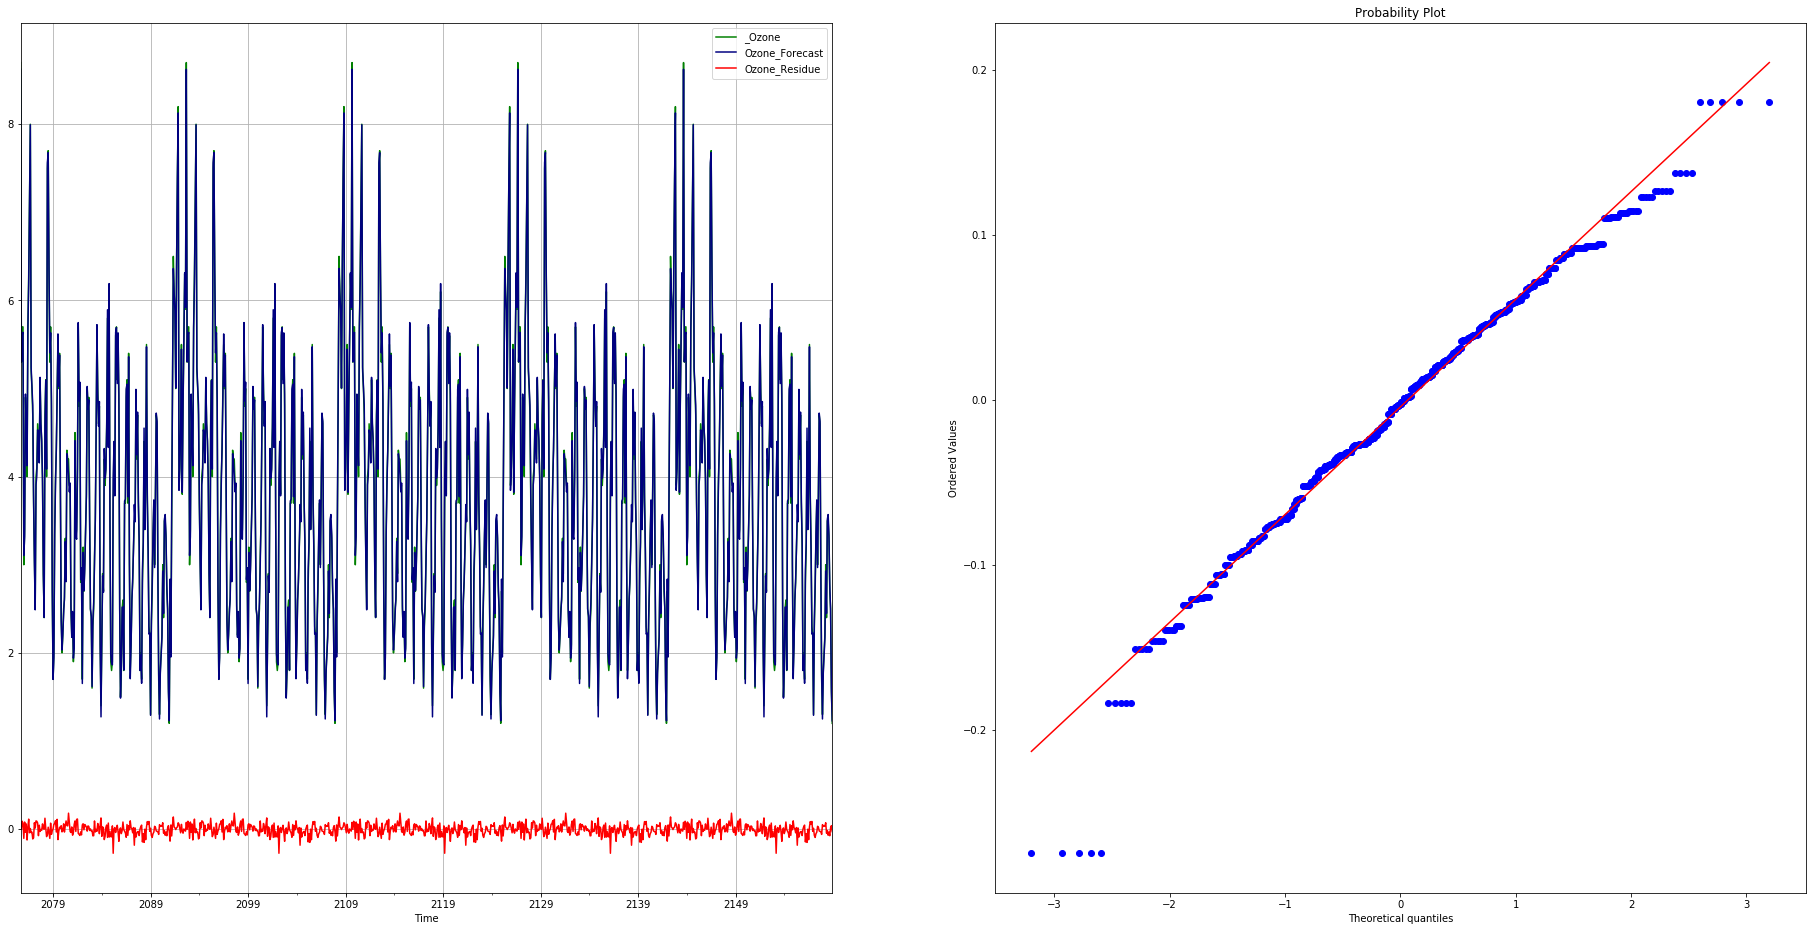

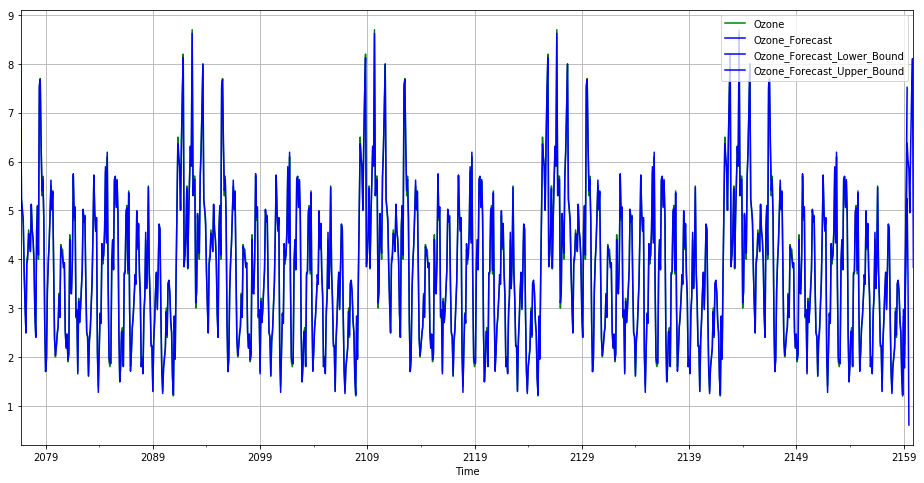

In [16]:
lEngine.standrdPlots()

In [17]:
lEngine.mSignalDecomposition.mBestModel.mTimeInfo.mTimeDelta

Timedelta('30 days 10:28:40')